In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk

training = pd.read_csv('setEntrenamiento.csv', low_memory = False)
test = pd.read_csv('setTesteo.csv', low_memory = False)
kaggle = pd.read_csv('setKaggle.csv', low_memory = False)

In [75]:
from sklearn.utils import shuffle
from numpy import sort
from matplotlib import pyplot
from xgboost import plot_importance
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, classification_report, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_auc_score, roc_curve

In [10]:
training["person"] = training["person"].astype(str)
test["person"] = test["person"].astype(str)
kaggle["person"] = kaggle["person"].astype(str)

In [11]:
kaggle["person"].head()

0    00091926
1    00091a7a
2    000ba417
3    000e4d9e
4    000e619d
Name: person, dtype: object

In [12]:
label_array = np.array(training['label'])
data_array = np.array(training.drop(columns=['label', 'person']))
kaggle_array = np.array(kaggle.drop(columns='person'))

In [13]:
kaggle_array

array([[372.,   0.,   2., ...,   0.,   0.,   0.],
       [  3.,   0.,   0., ...,   0.,   0.,   0.],
       [153.,   1.,   6., ...,  22.,   1.,   0.],
       ...,
       [  0.,   1.,   0., ...,   0.,   0.,   0.],
       [ 42.,  12.,   1., ...,   2.,   0.,   0.],
       [  4.,   1.,   1., ...,   0.,   0.,   0.]])

In [7]:
#CrossValidation y Grid Search RandomForest
x_train, x_test, y_train, y_test = train_test_split(data_array, label_array, test_size = 0, random_state = 0)
classifier = RandomForestClassifier(n_estimators = 300, random_state= 0)
all_accuracies = cross_val_score(estimator = classifier, X= x_train, y = y_train, cv = 5)
print(all_accuracies)

KeyboardInterrupt: 

In [ ]:
print(all_accuracies.mean())

In [ ]:
print(all_accuracies.std())

In [ ]:
#Empieza el gridSearch
grid_param = {
    "n_estimators": [300, 500, 800],
    "criterion": ["gini", "entropy"],
    "bootstrap": [True, False]
}

In [ ]:
from  sklearn.metrics import SCORERS

In [ ]:
#metricas que se pueden usar
SCORERS.keys()

In [ ]:
gd_sr = GridSearchCV(estimator=classifier, param_grid=grid_param, scoring="roc_auc", cv=5, n_jobs=1)

In [ ]:
#Esto va a tardar
gd_sr.fit(x_train, y_train)

In [ ]:
#muestra el mejor hiperparametro
best_parameters = gd_sr.best_params_
print(best_parameters)

In [ ]:
gd_sr.best_estimator_

In [ ]:
#Muestra el mejor score
gd_sr.best_score_

In [43]:
x_train, x_test, y_train, y_test = train_test_split(data_array, label_array, test_size = 0.33, random_state = 7)

In [14]:
def logisticReg(x_train, x_test, y_train, y_test):
    logReg = LogisticRegression(solver='sag', random_state=1)
    logReg.fit(x_train, y_train)
    y_pred = logReg.predict_proba(x_test)
    #return np.sqrt(mean_squared_error(y_test, y_pred))
    return roc_auc_score(y_test, y_pred[:,1])
    #return y_pred
#TAMBIEN PUEDEN USAR PARA VER EL ACCURACY
#ACCURACY = accuracy_score(y_test, y_pred)

In [15]:
def knn(k, x_train, x_test, y_train, y_test):
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn.fit(x_train, y_train)
    y_pred = knn.predict_proba(x_test)
    #return np.sqrt(mean_squared_error(y_test, y_pred))
    return roc_auc_score(y_test, y_pred[:,1])
#TAMBIEN PUEDEN USAR PARA VER EL ACCURACY
#ACCURACY = accuracy_score(y_test, y_pred)

In [16]:
def decisionTree(max_depth, x_train, x_test, y_train, y_test):
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(x_train, y_train)
    y_pred = dt.predict_proba(x_test)
#     return np.sqrt(mean_squared_error(y_test, y_pred))
    return roc_auc_score(y_test, y_pred[:,1])
#TAMBIEN PUEDEN USAR PARA VER EL ACCURACY
#ACCURACY = accuracy_score(y_test, y_pred)

In [17]:
def xgboost(max_depth, n_estimators, x_train, x_test, y_train, y_test):
    xgb = XGBClassifier(max_depth=max_depth, n_estimators=n_estimators)
    xgb.fit(x_train, y_train)
    y_pred = xgb.predict_proba(x_test)
    #return np.sqrt(mean_squared_error(y_test, y_pred))
    return roc_auc_score(y_test, y_pred[:,1])
#TAMBIEN PUEDEN USAR PARA VER EL ACCURACY
#ACCURACY = accuracy_score(y_test, y_pred)

In [18]:
def adaboost(nEstimators, learningRate, x_train, x_test, y_train, y_test):
    ada = AdaBoostClassifier(n_estimators=nEstimators, learning_rate=learningRate, random_state=0)
    ada.fit(x_train, y_train)
    y_pred = ada.predict_proba(x_test)
    return roc_auc_score(y_test, y_pred[:,1])
    #return np.sqrt(mean_squared_error(y_test, y_pred[:,1]))
#TAMBIEN PUEDEN USAR PARA VER EL ACCURACY
#ACCURACY = accuracy_score(y_test, y_pred)
#n_estimators is the number of models to iteratively train.
#learning_rate is the contribution of each model to the weights and defaults to 1. 
#Reducing the learning rate will mean the weights will be increased or decreased to a small degree, 
#forcing the model train slower (but sometimes resulting in better performance scores).

In [68]:
result = logisticReg(x_train, x_test, y_train, y_test)
result

0.5

In [69]:
result1 = knn(10, x_train, x_test, y_train, y_test)
result1

0.5

In [37]:
resultDecTree = decisionTree(150, x_train, x_test, y_train, y_test)
resultDecTree

0.560895563914086

In [39]:
resultXgboost = xgboost(10, 200,x_train, x_test, y_train, y_test )
resultXgboost

0.5117385200587032

In [10]:
score = logisticReg(x_train, x_test, y_train, y_test)
score

/home/martin/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.3887532574552452

In [27]:
score1 = knn(10, x_train, x_test, y_train, y_test)
score1

0.5820849518841736

In [26]:
scoreDecTree = decisionTree(100, x_train, x_test, y_train, y_test)
scoreDecTree

0.5632381706853452

In [34]:
#MD:5 EST:100 0.8252031462716871
#MD:10 EST:100 0.7931231854354848
scoreXgboost = xgboost(10, 100, x_train, x_test, y_train, y_test )
scoreXgboost

0.7931231854354848

In [35]:
xgboost = XGBClassifier()

In [36]:
#Empieza el gridSearch
xgb_grid_param = {
    'max_depth': [3, 5, 7, 9], #[3,4,5,6,7,8,9], # 5 is good but takes too long in kaggle env
    'subsample': [0.6, 0.8], #[0.4,0.5,0.6,0.7,0.8,0.9,1.0],
    'colsample_bytree': [0.6, 0.8], #[0.5,0.6,0.7,0.8],
    'n_estimators': [100, 500, 1000], #[1000,2000,3000]
    'learning_rate': [0.1]
}

In [37]:
xgb_gs = GridSearchCV(estimator=xgboost, param_grid=xgb_grid_param, scoring="roc_auc", cv=5, n_jobs=1)

In [8]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(data_array, label_array, test_size = 0.33, random_state = 1)

In [39]:
xgb_gs.fit(x_train2, y_train2)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'max_depth': [3, 5, 7, 9], 'subsample': [0.6, 0.8], 'colsample_bytree': [0.6, 0.8], 'n_estimators': [100, 500, 1000], 'learning_rate': [0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [40]:
#muestra el mejor hiperparametro
best_parameters = xgb_gs.best_params_
print(best_parameters)

{'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [41]:
xgb_gs.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)

In [42]:
#Muestra el mejor score
xgb_gs.best_score_

0.8349801057030514

In [50]:
scoreAda = adaboost(100, 0.1, x_train, x_test, y_train, y_test )
scoreAda

0.8277700847203846

In [54]:
def bagging(baseEstimator, nEstimators, learningRate, max_feature, bootstrap, bootstrap_feature, x_train, x_test, y_train, y_test):
    bag = BaggingClassifier(base_estimator=base_estimator, n_estimators=nEstimators, max_features=max_feature, bootstrap=bootstrap, bootstrap_features=bootstrap_feature, random_state=seed)
    bag.fit(x_train, y_train)
    y_pred = bag.predict_proba(x_test)
    #return np.sqrt(mean_squared_error(y_test, y_pred))
    return roc_auc_score(y_test, y_pred[:,1])
#TAMBIEN PUEDEN USAR PARA VER EL ACCURACY
#ACCURACY = accuracy_score(y_test, y_pred)

In [68]:
xgboostSuper = XGBClassifier(colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8)

In [71]:
bag = BaggingClassifier(base_estimator=xgboostSuper, n_estimators=100, max_features=5, bootstrap=True, random_state=2)
bag.fit(x_train, y_train)
y_pred = bag.predict_proba(x_test)
scoreBag = roc_auc_score(y_test, y_pred[:,1])
scoreBag

0.7315288748054022

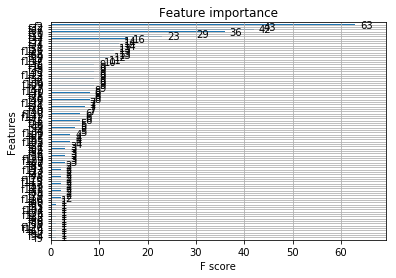

In [54]:
predict = XGBClassifier(colsample_bytree=0.6, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8)
predict.fit(x_train, y_train)
y_pred = predict.predict_proba(x_test)
scoreboost = roc_auc_score(y_test, y_pred[:,1])
plot_importance(predict)
pyplot.show()

In [64]:
predict = XGBClassifier(colsample_bytree=0.6, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8)
predict.fit(x_train, y_train)
y_pred = predict.predict_proba(x_test)
thresholds = sort(predict.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(predict, threshold=thresh, prefit=True)
    select_X_train = selection.transform(x_train)
   # train model
    selection_model = XGBClassifier(colsample_bytree=0.6, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8)
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(x_test)
    y_pred2 = selection_model.predict_proba(select_X_test)
    accuracy = roc_auc_score(y_test, y_pred2[:,1])
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.000, n=128, Accuracy: 83.29%
Thresh=0.000, n=128, Accuracy: 83.29%
Thresh=0.000, n=128, Accuracy: 83.29%
Thresh=0.000, n=128, Accuracy: 83.29%
Thresh=0.000, n=128, Accuracy: 83.29%
Thresh=0.000, n=128, Accuracy: 83.29%
Thresh=0.000, n=128, Accuracy: 83.29%
Thresh=0.000, n=128, Accuracy: 83.29%
Thresh=0.000, n=128, Accuracy: 83.29%
Thresh=0.000, n=128, Accuracy: 83.29%
Thresh=0.000, n=128, Accuracy: 83.29%
Thresh=0.000, n=128, Accuracy: 83.29%
Thresh=0.000, n=128, Accuracy: 83.29%
Thresh=0.000, n=128, Accuracy: 83.29%
Thresh=0.000, n=128, Accuracy: 83.29%
Thresh=0.000, n=128, Accuracy: 83.29%
Thresh=0.000, n=128, Accuracy: 83.29%
Thresh=0.000, n=128, Accuracy: 83.29%
Thresh=0.000, n=128, Accuracy: 83.29%
Thresh=0.000, n=128, Accuracy: 83.29%
Thresh=0.000, n=128, Accuracy: 83.29%
Thresh=0.000, n=128, Accuracy: 83.29%
Thresh=0.000, n=128, Accuracy: 83.29%
Thresh=0.000, n=128, Accuracy: 83.29%
Thresh=0.000, n=128, Accuracy: 83.29%
Thresh=0.000, n=128, Accuracy: 83.29%
Thresh=0.000

In [69]:
ada3 = AdaBoostClassifier(learning_rate=0.05, n_estimators=100)
ada3.fit(x_train, y_train)
y_pred = ada3.predict_proba(x_test)
thresholds = sort(ada3.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(ada3, threshold=thresh, prefit=True)
    select_X_train = selection.transform(x_train)
   # train model
    selection_model = AdaBoostClassifier(learning_rate=0.05, n_estimators=100)
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(x_test)
    y_pred2 = selection_model.predict_proba(select_X_test)
    accuracy = roc_auc_score(y_test, y_pred2[:,1])
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.000, n=128, Accuracy: 82.51%
Thresh=0.000, n=128, Accuracy: 82.51%
Thresh=0.000, n=128, Accuracy: 82.51%
Thresh=0.000, n=128, Accuracy: 82.51%
Thresh=0.000, n=128, Accuracy: 82.51%
Thresh=0.000, n=128, Accuracy: 82.51%
Thresh=0.000, n=128, Accuracy: 82.51%
Thresh=0.000, n=128, Accuracy: 82.51%
Thresh=0.000, n=128, Accuracy: 82.51%
Thresh=0.000, n=128, Accuracy: 82.51%
Thresh=0.000, n=128, Accuracy: 82.51%
Thresh=0.000, n=128, Accuracy: 82.51%
Thresh=0.000, n=128, Accuracy: 82.51%
Thresh=0.000, n=128, Accuracy: 82.51%
Thresh=0.000, n=128, Accuracy: 82.51%
Thresh=0.000, n=128, Accuracy: 82.51%
Thresh=0.000, n=128, Accuracy: 82.51%
Thresh=0.000, n=128, Accuracy: 82.51%
Thresh=0.000, n=128, Accuracy: 82.51%
Thresh=0.000, n=128, Accuracy: 82.51%
Thresh=0.000, n=128, Accuracy: 82.51%
Thresh=0.000, n=128, Accuracy: 82.51%
Thresh=0.000, n=128, Accuracy: 82.51%
Thresh=0.000, n=128, Accuracy: 82.51%
Thresh=0.000, n=128, Accuracy: 82.51%
Thresh=0.000, n=128, Accuracy: 82.51%
Thresh=0.000

In [70]:
kaggle_predict2 = ada3.predict_proba(kaggle_array)

In [71]:
kaggle_submit2 = {'person': kaggle["person"], 'label': kaggle_predict2[:,1]}
kaggle_submitDF2 = pd.DataFrame(data=kaggle_submit2)

In [72]:
kaggle_submitDF2.to_csv('setSubmitAda.csv', index=False)

In [73]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [76]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=288, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=30, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=288, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=30, bootstrap=True, total=   2.8s
[CV] n_estimators=288, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=30, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


[CV]  n_estimators=288, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=30, bootstrap=True, total=   2.7s
[CV] n_estimators=288, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=30, bootstrap=True 
[CV]  n_estimators=288, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=30, bootstrap=True, total=   2.7s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=10, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=10, bootstrap=True, total=   6.2s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=10, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=10, bootstrap=True, total=   6.0s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=10, bootstrap=True 
[CV]  n_estimators=1000, min_sa

[CV]  n_estimators=466, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=90, bootstrap=False, total=   6.6s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=log2, max_depth=10, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=log2, max_depth=10, bootstrap=False, total=   8.3s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=log2, max_depth=10, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=log2, max_depth=10, bootstrap=False, total=   8.2s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=log2, max_depth=10, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=log2, max_depth=10, bootstrap=False, total=   8.3s
[CV] n_estimators=822, min_samples_split=5, min_samples_leaf=2, max_features=log2, max_depth=10, bootstrap=False 
[CV]  n_estimato

[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=  11.5s
[CV] n_estimators=911, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=  11.5s
[CV] n_estimators=911, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=  11.4s
[CV] n_estimators=733, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=80, bootstrap=False 
[CV]  n_estimators=733, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=80, bootstrap=False, total=  10.5s
[CV] n_estimators=733, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=80, bootstrap=False 
[CV]  n_estimators=733,

[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=4, max_features=log2, max_depth=90, bootstrap=True, total=   7.7s
[CV] n_estimators=911, min_samples_split=2, min_samples_leaf=4, max_features=log2, max_depth=90, bootstrap=True 
[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=4, max_features=log2, max_depth=90, bootstrap=True, total=   7.6s
[CV] n_estimators=466, min_samples_split=10, min_samples_leaf=2, max_features=log2, max_depth=20, bootstrap=False 
[CV]  n_estimators=466, min_samples_split=10, min_samples_leaf=2, max_features=log2, max_depth=20, bootstrap=False, total=   5.8s
[CV] n_estimators=466, min_samples_split=10, min_samples_leaf=2, max_features=log2, max_depth=20, bootstrap=False 
[CV]  n_estimators=466, min_samples_split=10, min_samples_leaf=2, max_features=log2, max_depth=20, bootstrap=False, total=   5.7s
[CV] n_estimators=466, min_samples_split=10, min_samples_leaf=2, max_features=log2, max_depth=20, bootstrap=False 
[CV]  n_estimators=466, mi

[CV]  n_estimators=555, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=110, bootstrap=True, total=   5.4s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, total=  12.6s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, total=  12.5s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, total=  12.4s
[CV] n_estimators=288, min_samples_split=10, min_samples_leaf=4, max_features=log2, max_depth=80, bootstrap=False 
[CV]  n_estimators=288, min

[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True, total=  11.4s
[CV] n_estimators=911, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True, total=  11.5s
[CV] n_estimators=911, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True, total=  11.3s
[CV] n_estimators=733, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=733, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True, total=  10.0s
[CV] n_estimators=733, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=733, min_sampl

[CV]  n_estimators=555, min_samples_split=10, min_samples_leaf=1, max_features=log2, max_depth=80, bootstrap=False, total=   7.6s
[CV] n_estimators=555, min_samples_split=10, min_samples_leaf=1, max_features=log2, max_depth=80, bootstrap=False 
[CV]  n_estimators=555, min_samples_split=10, min_samples_leaf=1, max_features=log2, max_depth=80, bootstrap=False, total=   7.8s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False, total=  18.8s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False, total=  18.9s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimat

[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True, total=   2.3s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False, total=  17.5s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False, total=  17.8s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False, total=  17.3s
[CV] n_estimators=377, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=377

[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=log2, max_depth=None, bootstrap=False, total=  12.4s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=log2, max_depth=None, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=log2, max_depth=None, bootstrap=False, total=  12.9s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=log2, max_depth=None, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=log2, max_depth=None, bootstrap=False, total=  12.9s
[CV] n_estimators=466, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=40, bootstrap=True 
[CV]  n_estimators=466, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=40, bootstrap=True, total=   4.4s
[CV] n_estimators=466, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=40, bootstrap=True 
[CV]  n_estimato

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 41.4min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=1,
          param_distributions={'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'max_features': ['auto', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [77]:
rf_random.best_params_

{'n_estimators': 288,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 30,
 'bootstrap': True}

In [79]:
rd_predict = rf_random.best_estimator_.predict_proba(x_test)
rf_score = roc_auc_score(y_test, rd_predict[:,1])
rf_score

0.8088635702346643

In [81]:
boostRF = AdaBoostClassifier(rf_random.best_estimator_, learning_rate=0.05, n_estimators=100)
boostRF.fit(x_train, y_train)
y_pred = boostRF.predict_proba(x_test)
boostRF_score = roc_auc_score(y_test, y_pred[:,1])
boostRF_score

0.7487862196103585

In [10]:
x_test

array([[ 2.,  2.,  0., ...,  1.,  0.,  0.],
       [ 4.,  4.,  3., ...,  8.,  0.,  0.],
       [ 2.,  0.,  1., ...,  3.,  0.,  0.],
       ...,
       [ 1.,  0.,  1., ...,  0.,  0.,  0.],
       [ 2.,  2.,  1., ...,  0.,  0.,  0.],
       [51.,  0.,  4., ..., 31.,  0.,  0.]])

In [11]:
kaggle_array

array([[372.,   0.,   2., ...,   0.,   0.,   0.],
       [  3.,   0.,   0., ...,   0.,   0.,   0.],
       [153.,   1.,   6., ...,  22.,   1.,   0.],
       ...,
       [  0.,   1.,   0., ...,   0.,   0.,   0.],
       [ 42.,  12.,   1., ...,   2.,   0.,   0.],
       [  4.,   1.,   1., ...,   0.,   0.,   0.]])

In [13]:
kaggle_predict = predict.predict_proba(kaggle_array)
kaggle_predict[:,1]

array([0.06132358, 0.08046189, 0.12535949, ..., 0.08243927, 0.06676186,
       0.00970416], dtype=float32)

In [19]:
knn = KNeighborsClassifier()

In [20]:
#Empieza el gridSearch
knn_grid_param = {
    'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    'p': [1,2],
    'leaf_size': [10,20,30,40]
}

In [21]:
knn_gd = GridSearchCV(estimator=knn, param_grid=knn_grid_param, scoring="roc_auc", cv=5, n_jobs=1)

In [22]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(data_array, label_array, test_size = 0.33, random_state = 1)

In [23]:
knn_gd.fit(x_train3, y_train3)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'p': [1, 2], 'leaf_size': [10, 20, 30, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [24]:
#muestra el mejor hiperparametro
best_parameters = knn_gd.best_params_
print(best_parameters)

{'leaf_size': 30, 'n_neighbors': 15, 'p': 1}


In [25]:
knn_gd.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=1,
           weights='uniform')

In [26]:
#Muestra el mejor score
knn_gd.best_score_

0.6078649049787537

In [29]:
ada = AdaBoostClassifier()

In [30]:
#Empieza el gridSearch
ada_grid_param = {
    'n_estimators': [100, 250, 500],
    'learning_rate': [0.05, 0.1]
}

In [31]:
ada_gd = GridSearchCV(estimator=ada, param_grid=ada_grid_param, scoring="roc_auc", cv=5, n_jobs=1)

In [32]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(data_array, label_array, test_size = 0.33, random_state = 1)

In [33]:
ada_gd.fit(x_train4, y_train4)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'n_estimators': [100, 250, 500], 'learning_rate': [0.05, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [34]:
#muestra el mejor hiperparametro
best_parameters = ada_gd.best_params_
print(best_parameters)

{'learning_rate': 0.05, 'n_estimators': 100}


In [35]:
ada_gd.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.05, n_estimators=100, random_state=None)

In [36]:
#Muestra el mejor score
ada_gd.best_score_

0.8299552401667111

In [66]:
ada2 = AdaBoostClassifier(learning_rate=0.05, n_estimators=100)
ada2.fit(x_train4, y_train4)
y_pred = ada2.predict_proba(x_test4)
scoreada = roc_auc_score(y_test4, y_pred[:,1])
scoreada

0.8162078319106184

In [18]:
kaggle_submit = {'person': kaggle["person"], 'label': kaggle_predict[:,1]}
kaggle_submitDF = pd.DataFrame(data=kaggle_submit)
kaggle_submitDF

,person,label
0,00091926,0.061324
1,00091a7a,0.080462
2,000ba417,0.125359
3,000e4d9e,0.033969
4,000e619d,0.043656
5,001001be,0.049080
6,0010e89a,0.006724
7,0016c4b5,0.004262
8,001804a2,0.008107
9,001a2273,0.007239


In [20]:
kaggle_submitDF.to_csv('setSubmit.csv', index=False)